In [47]:
def CET_numerical(T,V):
    #linear extrapolation of volume at T=0
    v0 = V[0]-((V[1]-V[0])/(T[1]-T[0]))*T[0]
    T = np.insert(T, 0, 0.0)
    V = np.insert(V, 0, v0)
    CET = [0.0]
    for i in range(1,len(T)):
        CET.append((1.0/V[i])*(V[i]-V[i-1])/(T[i]-T[i-1]))
    
    #for i in range(len(T)-1):
    #    CET.append((1.0/(V[i]))*(V[i]-V[i+1])/(T[i]-T[i+1]))
    return np.array(CET[1:])

[430.857411 430.857398 430.857385 430.857332 430.857249 430.857182
 430.857186 430.857313 430.857611 430.858122 430.85889  430.85995
 430.861341 430.863093 430.865236 430.867795 430.870794 430.87425
 430.87818  430.882596 430.887506 430.892917 430.898832 430.905251
 430.912173 430.919592 430.927504 430.9359   430.944769 430.954101
 430.963883]
[-3.017240e-09 -3.017240e-09 -1.230106e-08 -1.926392e-08 -1.555040e-08
  9.283819e-10  2.947612e-08  6.916438e-08  1.186005e-07  1.782486e-07
  2.460196e-07  3.228417e-07  4.066257e-07  4.973713e-07  5.939177e-07
  6.960323e-07  8.020902e-07  9.120907e-07  1.024873e-06  1.139509e-06
  1.255764e-06  1.372712e-06  1.489655e-06  1.606360e-06  1.721667e-06
  1.836040e-06  1.948318e-06  2.058036e-06  2.165428e-06  2.269796e-06] [-3.01723958e-09 -3.01723968e-09 -1.23010556e-08 -1.92639210e-08
 -1.55503965e-08  9.28381868e-10  2.94761157e-08  6.91643811e-08
  1.18600526e-07  1.78248614e-07  2.46019617e-07  3.22841682e-07
  4.06625684e-07  4.97371294e-07

<Figure size 900x600 with 0 Axes>

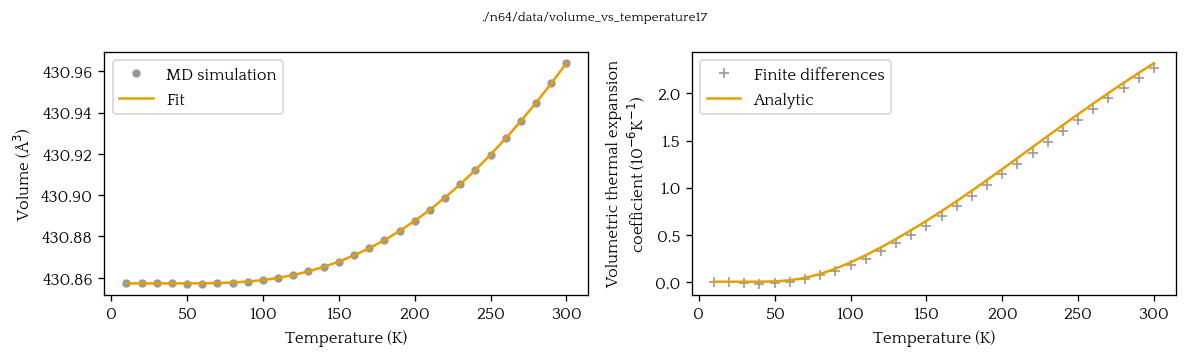

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cycler

#plt.style.use('/home/giovani/Dropbox/matplotlib/paper_style.mplstyle')
plt.rcParams['font.sans-serif'] = "Quattrocento"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.prop_cycle'] = cycler('color', ["999999", "e69f00", "56b4e9", "009e73", "f0e442", "0072b2", "d55e00", "cc79a7"])
plt.rcParams['savefig.bbox'] = 'tight'
folder = 'n64'
i = 17

plt.figure(dpi=150)

file = f'./{folder}/data/volume_vs_temperature{i:02d}.fit'
x_data, y_data, y_fit, a, z_data, z_fit, c = np.loadtxt(file,unpack=True)
x_fit=x_data
z_data2 = CET_numerical(x_data,y_data)


fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,dpi=120,figsize=(10,3))
ax1.plot(x_data, y_data, 'o', label='MD simulation', ms=4)
ax1.plot(x_fit, y_fit, '-',label='Fit')
ax1.set_ylabel('Volume (Å$^3$)')
ax1.set_xlabel('Temperature (K)')
ax1.legend()
ax2.plot(x_data, 1e6*z_data, '+',label='Finite differences')
ax2.plot(x_fit, 1e6*z_fit, label='Analytic')
ax2.set_xlabel('Temperature (K)')
ax2.set_ylabel('Volumetric thermal expansion\ncoefficient (10$^{-6}$K$^{-1}$)')
ax2.legend()
plt.suptitle(file.rstrip('.fit'), fontsize=8)
#plt.savefig(file.rstrip('dat')+'png')
plt.tight_layout()
plt.savefig('teste2.pdf')
plt.show()